

---



In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kostyasereginmailru","key":"ad05ad97cdde449caa2e57874c5b2819"}'}

In [ ]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 75 Jul  9 06:23 kaggle.json


In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d crawford/emnist

 99% 1.23G/1.24G [00:12<00:00, 144MB/s]
100% 1.24G/1.24G [00:12<00:00, 108MB/s]


In [ ]:
!unzip -qq /content/emnist.zip

In [ ]:
import pandas as pd
df=pd.read_csv('/content/housing.csv')

In [ ]:
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17405,-120.45,34.95,7.0,1479.0,532.0,1057.0,459.0,2.2538,162500.0,<1H OCEAN
13734,-117.19,34.05,33.0,3007.0,498.0,1252.0,488.0,3.8816,134600.0,INLAND
10460,-117.63,33.47,4.0,2320.0,405.0,1408.0,477.0,6.3369,256000.0,NEAR OCEAN
15273,-117.28,33.06,8.0,4172.0,1022.0,2585.0,941.0,4.0118,245800.0,NEAR OCEAN
18151,-122.04,37.34,19.0,3694.0,1036.0,2496.0,986.0,3.6991,271500.0,<1H OCEAN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.ocean_proximity.value_counts()#.unique()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
df.shape

(20640, 10)

In [ ]:
dct_codes = {l:t for t,l in enumerate(set(df.ocean_proximity))}
codes_ocean = []
for i in df.ocean_proximity:
  for j in dct_codes:
    if i == j:
      codes_ocean.append(dct_codes[j])
print(f'кодировка: {dct_codes}\nпроверка длины: {len(codes_ocean)}')

кодировка: {'ISLAND': 0, 'NEAR BAY': 1, '<1H OCEAN': 2, 'INLAND': 3, 'NEAR OCEAN': 4}
проверка длины: 20640


In [ ]:
df.ocean_proximity = codes_ocean
df.ocean_proximity = df.ocean_proximity.astype('float64')
cols = df.columns.tolist()
cols = cols[:8] + cols[-1:] + cols[8:9]
df = df[cols]
df.sample(6)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1474,-122.04,37.97,26.0,2470.0,626.0,1174.0,573.0,2.9861,1.0,160900.0
14261,-117.12,32.70,36.0,1011.0,253.0,763.0,226.0,1.8187,4.0,84100.0
18119,-122.03,37.32,15.0,5132.0,1059.0,2156.0,982.0,5.6511,2.0,404800.0
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,2.0,268500.0
9776,-121.24,36.34,33.0,1691.0,308.0,792.0,262.0,2.6648,2.0,164600.0
10645,-117.80,33.55,35.0,2067.0,428.0,724.0,377.0,5.8371,2.0,500001.0


In [ ]:
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,1.0,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,1.0,358500.0


In [ ]:
df.astype('float32').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float32
 1   latitude            20640 non-null  float32
 2   housing_median_age  20640 non-null  float32
 3   total_rooms         20640 non-null  float32
 4   total_bedrooms      20433 non-null  float32
 5   population          20640 non-null  float32
 6   households          20640 non-null  float32
 7   median_income       20640 non-null  float32
 8   ocean_proximity     20640 non-null  float32
 9   median_house_value  20640 non-null  float32
dtypes: float32(10)
memory usage: 806.4 KB


In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,0.179531,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.066080,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,-0.206445,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.015509,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.004480,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.007563,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,-0.016085,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,-0.128302,0.688075
ocean_proximity,0.179531,-0.066080,-0.206445,0.015509,0.004480,-0.007563,-0.016085,-0.128302,1.000000,-0.212746
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,-0.212746,1.000000


In [ ]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [ ]:
import numpy as np

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [ ]:
данные_все = df.to_numpy()

In [ ]:
данные_все[0]

array([-1.2223e+02,  3.7880e+01,  4.1000e+01,  8.8000e+02,  1.2900e+02,
        3.2200e+02,  1.2600e+02,  8.3252e+00,  1.0000e+00,  4.5260e+05])

In [ ]:
import torch

In [ ]:
X = torch.Tensor(min_max_scaler.fit_transform(данные_все[:,0:9]))
Y = torch.Tensor(данные_все[:,9])/500001.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=1)

In [ ]:
X_train[:2]

tensor([[0.2092, 0.5654, 0.9216, 0.0547, 0.0801, 0.0463, 0.0753, 0.1753, 0.2500],
        [0.4602, 0.4485, 0.5686, 0.0393, 0.0436, 0.0247, 0.0510, 0.1793, 0.7500]])

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

(torch.Size([16346, 9]),
 torch.Size([4087, 9]),
 torch.Size([16346]),
 torch.Size([4087]))

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
dataset_train = TensorDataset(X_train, Y_train)
dataset_test = TensorDataset(X_test, Y_test)

In [ ]:
train_dl = DataLoader(dataset_train, batch_size=32, shuffle=True)
test_dl = DataLoader(dataset_test, batch_size=32, shuffle=False)

In [ ]:
model = torch.nn.Sequential(torch.nn.Linear(9, 1))
model

Sequential(
  (0): Linear(in_features=9, out_features=1, bias=True)
)

In [ ]:
loss = torch.nn.MSELoss(reduction='mean')

In [ ]:
opt = torch.optim.SGD(model.parameters(), lr=0.001)

In [ ]:
print(model[0].weight.data)
print(model[0].bias.data)

tensor([[-0.1518, -0.1952,  0.1500,  0.0912,  0.1326, -0.2005,  0.1116,  1.0006,
         -0.1171]])

tensor([0.2914])

In [ ]:
%%capture
!pip install torch_snippets
from torch_snippets import *

In [ ]:
for x,y in train_dl:
  print(model(x).squeeze(1))
  print(y)
  break

tensor([0.5141, 0.3748, 0.4138, 0.5229, 0.4200, 0.4446, 0.5345, 0.1503, 0.5070,
        0.4010, 0.5429, 0.5165, 0.3681, 0.4292, 0.4022, 0.2695, 0.2930, 0.4187,
        0.4663, 0.4613, 0.5179, 0.1580, 0.4924, 0.1553, 0.4541, 0.4007, 0.1484,
        0.5309, 0.3914, 0.4256, 0.5250, 0.4003], grad_fn=<SqueezeBackward1>)

tensor([0.6758, 0.3320, 0.3994, 0.1714, 0.4822, 0.4582, 0.2302, 0.9000, 0.9910,
        0.4120, 0.9682, 0.1334, 0.0954, 0.1722, 0.5362, 0.2078, 0.5400, 0.1112,
        0.5484, 0.1768, 0.2278, 0.8000, 0.3744, 1.0000, 0.5460, 0.2318, 0.3646,
        0.3528, 0.1966, 0.3520, 0.7520, 0.4762])



---



In [ ]:
print(Y_train.shape)

torch.Size([16346])

In [ ]:
print(model(X_train).shape)

torch.Size([16346, 1])

In [ ]:
print(model(X_train).squeeze(1).shape)

torch.Size([16346])



---



In [ ]:
num_epochs = 100
log = Report(num_epochs)
for epoch in range(1, num_epochs + 1):
    N = len(train_dl)
    for ix, data in enumerate(train_dl):
        model.train()
        opt.zero_grad()
        l = loss(model(data[0]).squeeze(1), data[1])
        l.backward()
        opt.step()
        log.record(epoch+(ix+1)/N, trn_loss=l, end='\r')
    N = len(test_dl)
    for ix, data in enumerate(test_dl):
      model.eval()
      with torch.no_grad():
        pred_age = model(data[0])
        lo = loss(pred_age.squeeze(1), data[1])
        log.record(epoch+(ix+1)/N, val_loss=lo, end='\r')
    log.report_avgs(epoch+1)

EPOCH: 2.000  trn_loss: 0.065  val_loss: 0.062  (0.76s - 37.48s remaining)
EPOCH: 3.000  trn_loss: 0.062  val_loss: 0.059  (1.54s - 49.90s remaining)
EPOCH: 4.000  trn_loss: 0.059  val_loss: 0.056  (2.30s - 55.18s remaining)
EPOCH: 5.000  trn_loss: 0.057  val_loss: 0.054  (3.05s - 58.00s remaining)
EPOCH: 6.000  trn_loss: 0.055  val_loss: 0.052  (3.80s - 59.54s remaining)
EPOCH: 7.000  trn_loss: 0.053  val_loss: 0.050  (4.54s - 60.32s remaining)
EPOCH: 8.000  trn_loss: 0.051  val_loss: 0.049  (5.29s - 60.79s remaining)
EPOCH: 9.000  trn_loss: 0.049  val_loss: 0.047  (6.05s - 61.14s remaining)
EPOCH: 10.000  trn_loss: 0.048  val_loss: 0.046  (6.79s - 61.13s remaining)
EPOCH: 11.000  trn_loss: 0.046  val_loss: 0.045  (7.55s - 61.12s remaining)
EPOCH: 12.000  trn_loss: 0.045  val_loss: 0.044  (8.43s - 61.84s remaining)
EPOCH: 13.000  trn_loss: 0.044  val_loss: 0.043  (9.31s - 62.32s remaining)
EPOCH: 14.000  trn_loss: 0.043  val_loss: 0.042  (10.18s - 62.53s remaining)
EPOCH: 15.000  trn_

100%|██████████| 201/201 [00:01<00:00, 126.72it/s]


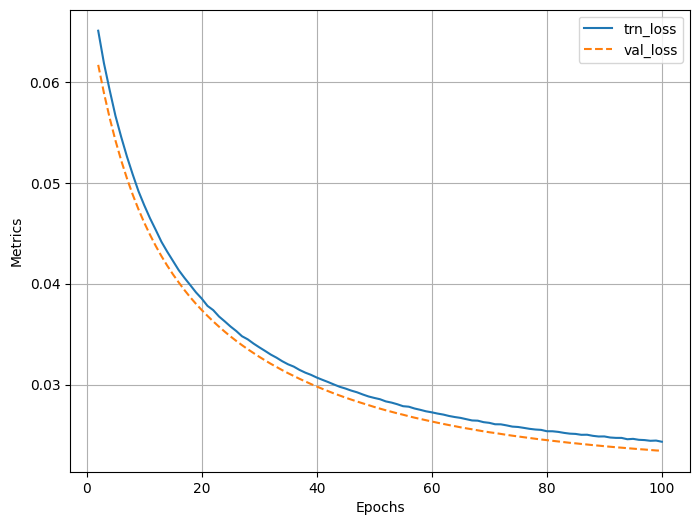

In [ ]:
log.plot_epochs()

In [ ]:
model(dataset_train[20][0])

tensor([0.1716], grad_fn=<AddBackward0>)

In [ ]:
dataset_train[20][1]

tensor(0.1370)